# Task
Analyze smartphone sales data by generating the data, performing exploratory data analysis, preprocessing, visualizing overall sales trends, regional performance, product performance, market share, and summarizing key findings.

## Data Generation

### Subtask:
 smartphone sales data for the past 10 years, including columns like 'Year', 'Month', 'Region', 'Product_Category', 'Model', 'Units_Sold', and 'Revenue'.


**Reasoning**:
The first step is to import the necessary libraries, `pandas` for data manipulation and `numpy` for numerical operations, which will be used throughout the data generation process.



In [1]:
import pandas as pd
import numpy as np
import datetime

print("pandas, numpy, and datetime libraries imported.")

pandas, numpy, and datetime libraries imported.


In [2]:
current_year = datetime.datetime.now().year
start_year = current_year - 10
num_years = 10

regions = ['North America', 'Europe', 'Asia', 'South America', 'Africa', 'Oceania']
product_categories = ['Smartphone', 'Feature Phone', 'Accessories']
models = [
    'Model A1', 'Model B2', 'Model C3', 'Model D4', 'Model E5',
    'Model F6', 'Model G7', 'Model H8', 'Model I9', 'Model J10',
    'Model K11', 'Model L12', 'Model M13', 'Model N14', 'Model O15',
    'Model P16', 'Model Q17', 'Model R18', 'Model S19', 'Model T20'
]

print(f"Data will be generated from {start_year} for {num_years} years.")
print(f"Regions: {regions}")
print(f"Product Categories: {product_categories}")
print(f"Number of Models: {len(models)}")

Data will be generated from 2015 for 10 years.
Regions: ['North America', 'Europe', 'Asia', 'South America', 'Africa', 'Oceania']
Product Categories: ['Smartphone', 'Feature Phone', 'Accessories']
Number of Models: 20


In [3]:
data_rows = []
for year in range(start_year, start_year + num_years):
    for month in range(1, 13):
        data_rows.append({'Year': year, 'Month': month})

# Create a base DataFrame from the generated years and months
df_base = pd.DataFrame(data_rows)

print(f"Base DataFrame created with {len(df_base)} rows, covering {num_years} years.")
print(df_base.head())

Base DataFrame created with 120 rows, covering 10 years.
   Year  Month
0  2015      1
1  2015      2
2  2015      3
3  2015      4
4  2015      5


In [4]:
from itertools import product

# Create a list of all combinations of Year, Month, Region, Product_Category, Model
all_combinations = list(product(
    df_base['Year'].unique(),
    df_base['Month'].unique(),
    regions,
    product_categories,
    models
))

# Create the main DataFrame from all combinations
df_sales = pd.DataFrame(all_combinations, columns=['Year', 'Month', 'Region', 'Product_Category', 'Model'])

# Generate random Units_Sold and Revenue, ensuring Revenue is proportional to Units_Sold
df_sales['Units_Sold'] = np.random.randint(1000, 10001, size=len(df_sales)) # Units between 1000 and 10000
# Assuming an average price per unit between $500 and $1000
price_per_unit = np.random.uniform(500, 1000, size=len(df_sales))
df_sales['Revenue'] = df_sales['Units_Sold'] * price_per_unit
df_sales['Revenue'] = df_sales['Revenue'].round(2) # Round revenue to 2 decimal places

print(f"Final synthetic sales data generated with {len(df_sales)} rows.")
print(df_sales.head())

Final synthetic sales data generated with 43200 rows.
   Year  Month         Region Product_Category     Model  Units_Sold  \
0  2015      1  North America       Smartphone  Model A1        8622   
1  2015      1  North America       Smartphone  Model B2        3274   
2  2015      1  North America       Smartphone  Model C3        1082   
3  2015      1  North America       Smartphone  Model D4        8657   
4  2015      1  North America       Smartphone  Model E5        3730   

      Revenue  
0  4874769.38  
1  2421569.83  
2   656269.28  
3  4430073.68  
4  3635672.14  


## Data Loading and Initial Exploration

### Subtask:
Load the data into a pandas DataFrame and perform initial exploration (e.g., .head(), .info(), .describe()) to understand its structure and content.


**Reasoning**:
To perform initial exploration of the `df_sales` DataFrame, I will display its first few rows using `.head()`, show its summary information with `.info()`, and descriptive statistics for numerical columns using `.describe()`.



In [5]:
print("First 5 rows of the sales DataFrame:")
print(df_sales.head())

print("\nInformation about the sales DataFrame:")
df_sales.info()

print("\nDescriptive statistics for the sales DataFrame:")
print(df_sales.describe())

First 5 rows of the sales DataFrame:
   Year  Month         Region Product_Category     Model  Units_Sold  \
0  2015      1  North America       Smartphone  Model A1        8622   
1  2015      1  North America       Smartphone  Model B2        3274   
2  2015      1  North America       Smartphone  Model C3        1082   
3  2015      1  North America       Smartphone  Model D4        8657   
4  2015      1  North America       Smartphone  Model E5        3730   

      Revenue  
0  4874769.38  
1  2421569.83  
2   656269.28  
3  4430073.68  
4  3635672.14  

Information about the sales DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43200 entries, 0 to 43199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              43200 non-null  int64  
 1   Month             43200 non-null  int64  
 2   Region            43200 non-null  object 
 3   Product_Category  43200 non-null  object 
 4  

## Data Preprocessing

### Subtask:
Clean and prepare the data, including converting data types, handling any potential missing values, and creating new features necessary for analysis.


In [6]:
print("Checking for missing values in df_sales:")
print(df_sales.isnull().sum())

# Create 'Date' column
df_sales['Date'] = pd.to_datetime(df_sales['Year'].astype(str) + '-' + df_sales['Month'].astype(str) + '-01')

print("\n'Date' column created and converted to datetime type.")
print(df_sales[['Year', 'Month', 'Date']].head())
print(df_sales.info())

Checking for missing values in df_sales:
Year                0
Month               0
Region              0
Product_Category    0
Model               0
Units_Sold          0
Revenue             0
dtype: int64

'Date' column created and converted to datetime type.
   Year  Month       Date
0  2015      1 2015-01-01
1  2015      1 2015-01-01
2  2015      1 2015-01-01
3  2015      1 2015-01-01
4  2015      1 2015-01-01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43200 entries, 0 to 43199
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Year              43200 non-null  int64         
 1   Month             43200 non-null  int64         
 2   Region            43200 non-null  object        
 3   Product_Category  43200 non-null  object        
 4   Model             43200 non-null  object        
 5   Units_Sold        43200 non-null  int64         
 6   Revenue           43200 non-null  fl

**Reasoning**:
To further enhance the dataset for time-series analysis and provide more granular insights, I will extract the 'Quarter' and 'Month Name' from the newly created 'Date' column. This will allow for easier aggregation and analysis of sales trends across different quarters and months.



In [7]:
df_sales['Quarter'] = df_sales['Date'].dt.quarter
df_sales['Month_Name'] = df_sales['Date'].dt.month_name()

print("New 'Quarter' and 'Month_Name' columns created.")
print(df_sales[['Date', 'Quarter', 'Month_Name']].head())
print(df_sales.info())

New 'Quarter' and 'Month_Name' columns created.
        Date  Quarter Month_Name
0 2015-01-01        1    January
1 2015-01-01        1    January
2 2015-01-01        1    January
3 2015-01-01        1    January
4 2015-01-01        1    January
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43200 entries, 0 to 43199
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Year              43200 non-null  int64         
 1   Month             43200 non-null  int64         
 2   Region            43200 non-null  object        
 3   Product_Category  43200 non-null  object        
 4   Model             43200 non-null  object        
 5   Units_Sold        43200 non-null  int64         
 6   Revenue           43200 non-null  float64       
 7   Date              43200 non-null  datetime64[ns]
 8   Quarter           43200 non-null  int32         
 9   Month_Name        43200 non-null  object      

## Overall Sales Trends Over Time

### Subtask:
Visualize the overall sales revenue and units sold over the 10-year period using line plots (yearly and monthly trends).


**Reasoning**:
To visualize the overall sales trends, I will first import the necessary plotting libraries, `matplotlib.pyplot` and `seaborn`, then calculate the yearly and monthly aggregated sales data for both revenue and units sold, and finally generate the requested line plots for each trend.



matplotlib.pyplot and seaborn libraries imported.

Yearly sales data:
   Year       Revenue  Units_Sold
0  2015  1.801507e+10    24025832
1  2016  1.778864e+10    23648384
2  2017  1.805928e+10    24027536
3  2018  1.766943e+10    23627181
4  2019  1.785603e+10    23856004


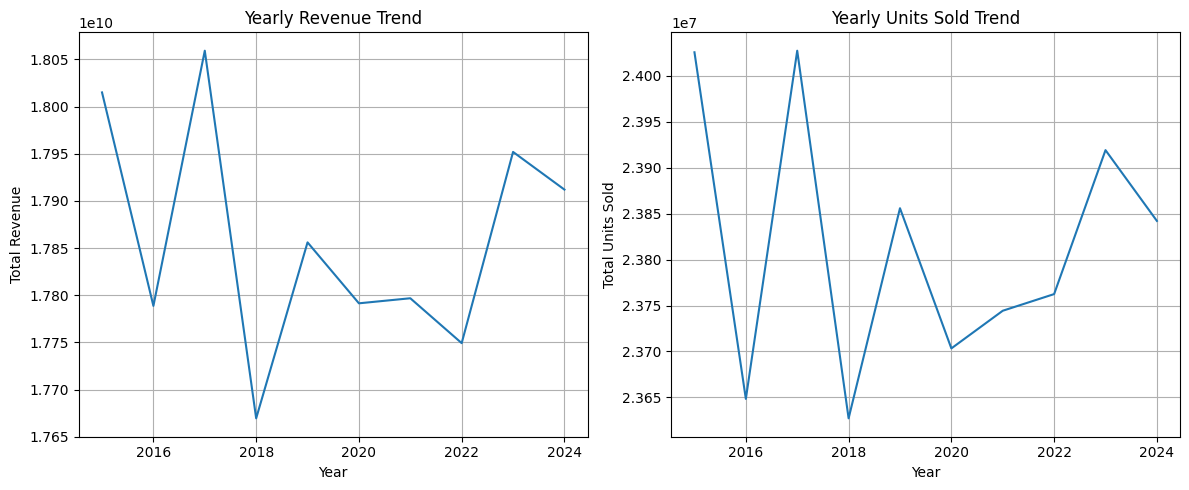


Monthly sales data:
        Date       Revenue  Units_Sold
0 2015-01-01  1.480292e+09     1979874
1 2015-02-01  1.520799e+09     2041544
2 2015-03-01  1.504014e+09     1972577
3 2015-04-01  1.513886e+09     2022964
4 2015-05-01  1.517816e+09     2040037


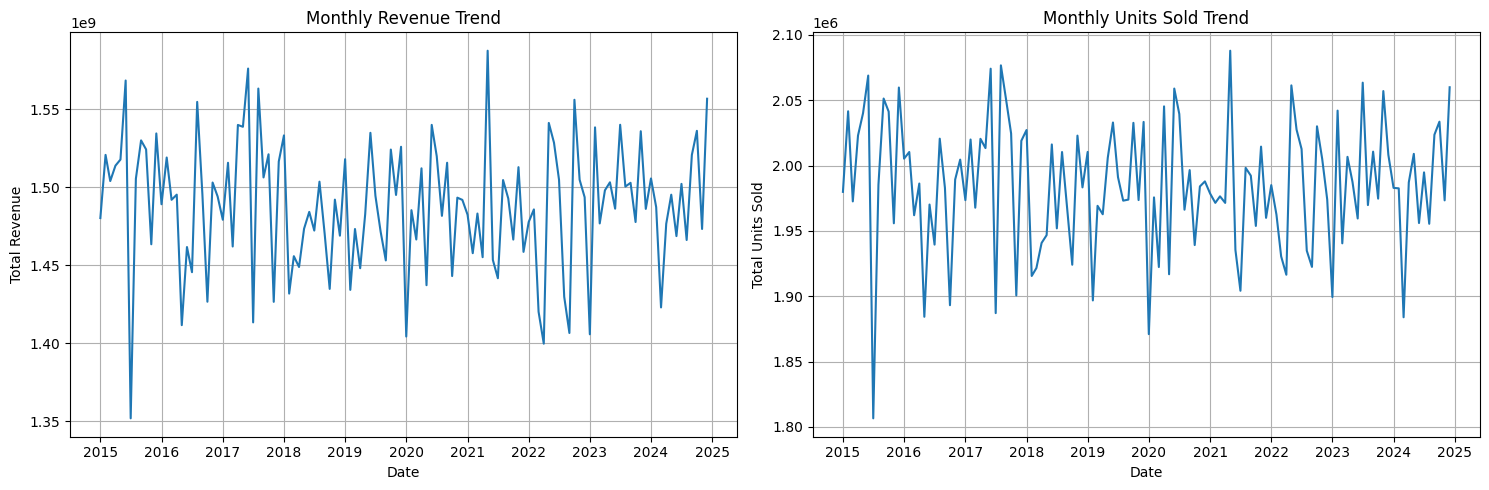

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

print("matplotlib.pyplot and seaborn libraries imported.")

# 2. Calculate yearly sales
yearly_sales = df_sales.groupby('Year')[['Revenue', 'Units_Sold']].sum().reset_index()

print("\nYearly sales data:")
print(yearly_sales.head())

# 3. Create line plots for yearly trends
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='Revenue', data=yearly_sales)
plt.title('Yearly Revenue Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='Units_Sold', data=yearly_sales)
plt.title('Yearly Units Sold Trend')
plt.xlabel('Year')
plt.ylabel('Total Units Sold')
plt.grid(True)

plt.tight_layout()
plt.show()

# 4. Calculate monthly sales (by Date)
monthly_sales = df_sales.groupby('Date')[['Revenue', 'Units_Sold']].sum().reset_index()

print("\nMonthly sales data:")
print(monthly_sales.head())

# 5. Create line plots for monthly trends
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.lineplot(x='Date', y='Revenue', data=monthly_sales)
plt.title('Monthly Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.lineplot(x='Date', y='Units_Sold', data=monthly_sales)
plt.title('Monthly Units Sold Trend')
plt.xlabel('Date')
plt.ylabel('Total Units Sold')
plt.grid(True)

plt.tight_layout()
plt.show()

## Regional Sales Analysis

### Subtask:
Analyze and visualize sales performance by different regions using bar charts or pie charts to show distribution and trends.


**Reasoning**:
To analyze regional sales performance, I will aggregate the `df_sales` DataFrame by 'Region' to sum 'Revenue' and 'Units_Sold'. Then, I will create bar charts to visualize these aggregated metrics for each region.



Regional Sales Data:
          Region       Revenue  Units_Sold
0         Africa  2.961542e+10    39564163
1           Asia  2.976356e+10    39604457
2         Europe  2.967723e+10    39713249
3  North America  2.965734e+10    39496247
4        Oceania  2.997819e+10    39962363
5  South America  2.989804e+10    39816098


/tmp/ipython-input-3973641807.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Revenue', data=regional_sales, palette='viridis')


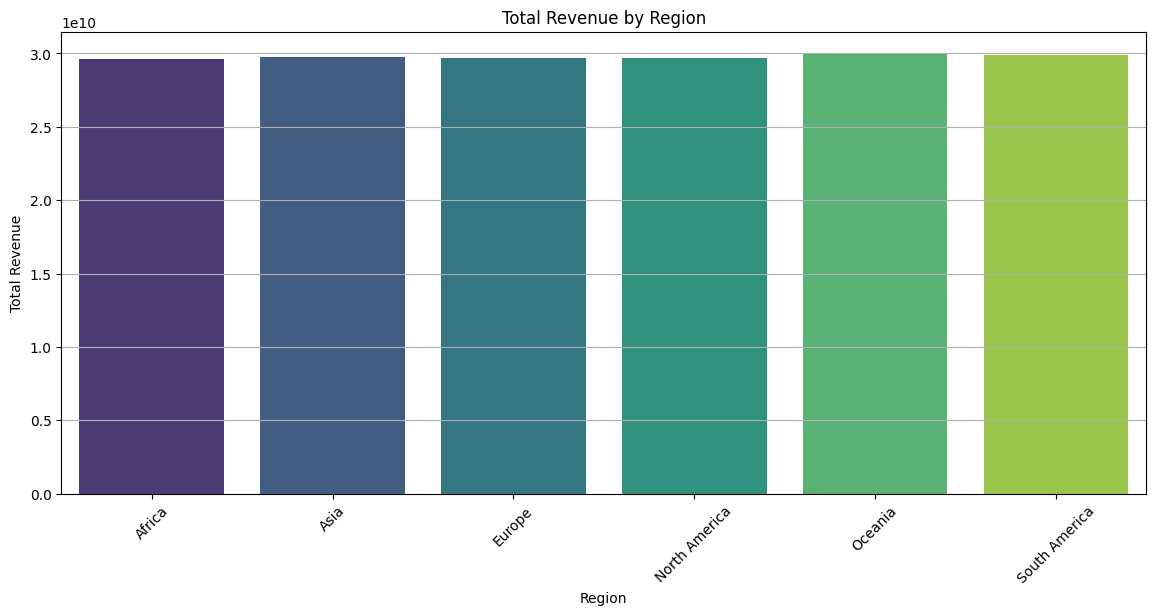

/tmp/ipython-input-3973641807.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Units_Sold', data=regional_sales, palette='magma')


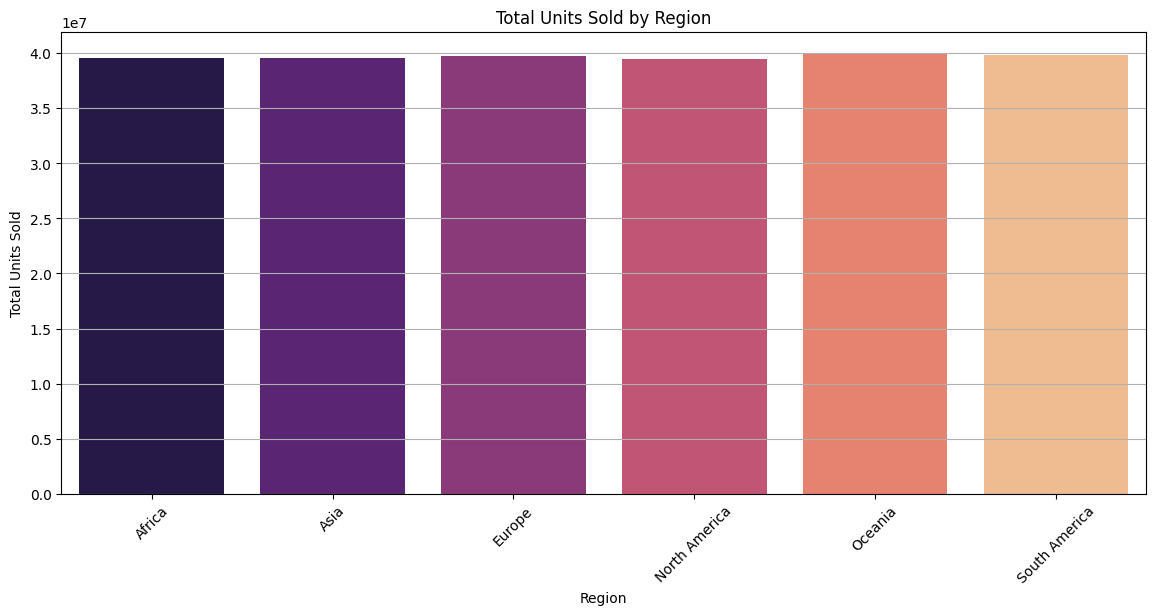

In [9]:
regional_sales = df_sales.groupby('Region')[['Revenue', 'Units_Sold']].sum().reset_index()

print("Regional Sales Data:")
print(regional_sales)

# Create bar chart for total Revenue by Region
plt.figure(figsize=(14, 6))
sns.barplot(x='Region', y='Revenue', data=regional_sales, palette='viridis')
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Create bar chart for total Units Sold by Region
plt.figure(figsize=(14, 6))
sns.barplot(x='Region', y='Units_Sold', data=regional_sales, palette='magma')
plt.title('Total Units Sold by Region')
plt.xlabel('Region')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Reasoning**:
To address the `FutureWarning` issued by seaborn regarding the `palette` argument, I will explicitly set the `hue` parameter to 'Region' and `legend` to `False` in both `sns.barplot` calls. This ensures proper color mapping and suppresses unnecessary warnings.



Regional Sales Data:
          Region       Revenue  Units_Sold
0         Africa  2.961542e+10    39564163
1           Asia  2.976356e+10    39604457
2         Europe  2.967723e+10    39713249
3  North America  2.965734e+10    39496247
4        Oceania  2.997819e+10    39962363
5  South America  2.989804e+10    39816098


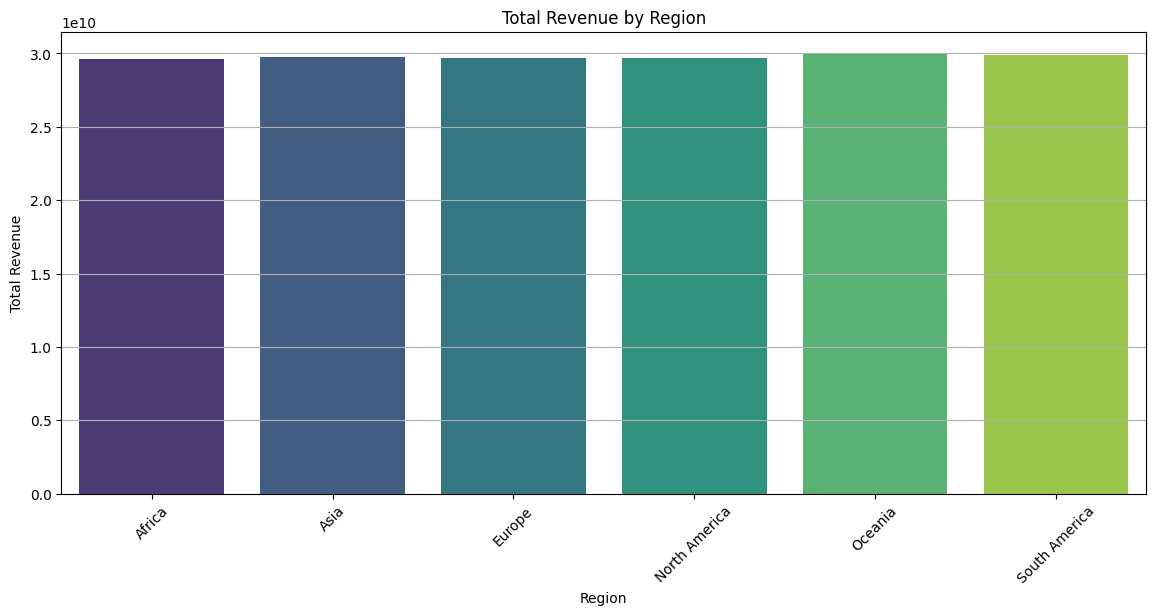

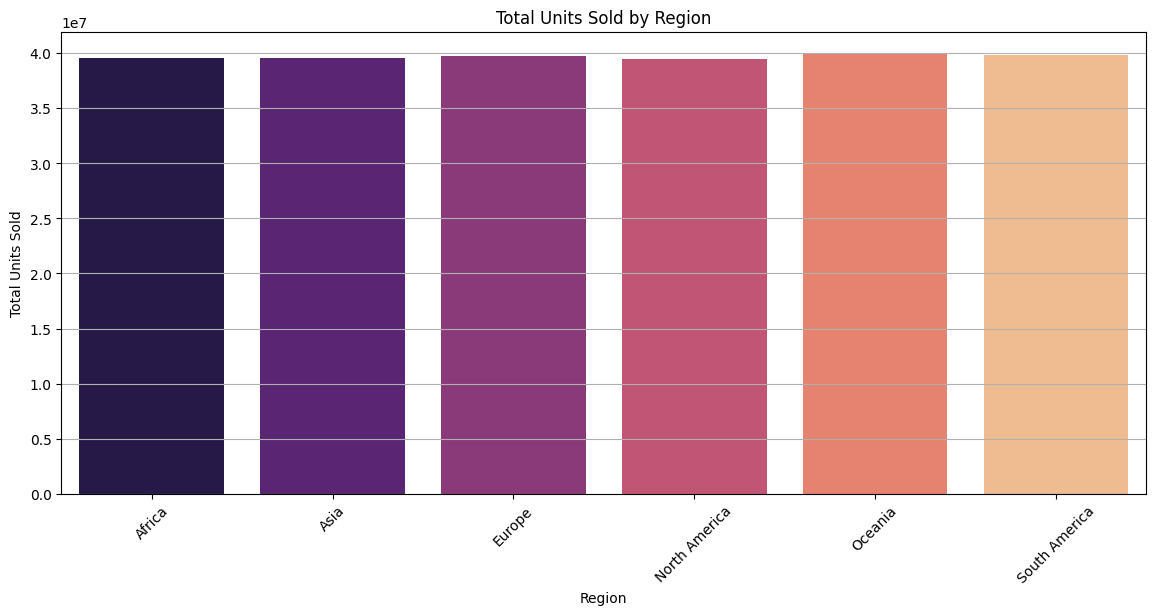

In [10]:
regional_sales = df_sales.groupby('Region')[['Revenue', 'Units_Sold']].sum().reset_index()

print("Regional Sales Data:")
print(regional_sales)

# Create bar chart for total Revenue by Region
plt.figure(figsize=(14, 6))
sns.barplot(x='Region', y='Revenue', data=regional_sales, palette='viridis', hue='Region', legend=False)
plt.title('Total Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Create bar chart for total Units Sold by Region
plt.figure(figsize=(14, 6))
sns.barplot(x='Region', y='Units_Sold', data=regional_sales, palette='magma', hue='Region', legend=False)
plt.title('Total Units Sold by Region')
plt.xlabel('Region')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Product Performance Analysis

### Subtask:
Identify top-selling smartphone models and product categories, and visualize their sales trends and revenue contribution.


**Reasoning**:
To identify top-selling product categories, I will first aggregate the sales data by 'Product_Category' to calculate total revenue and units sold. Then, I will display the aggregated data and visualize these metrics using bar plots to easily compare performance across different product categories.



Sales Data by Product Category:
  Product_Category       Revenue  Units_Sold
0      Accessories  6.000665e+10    79986832
1    Feature Phone  5.923851e+10    78931151
2       Smartphone  5.934462e+10    79238594


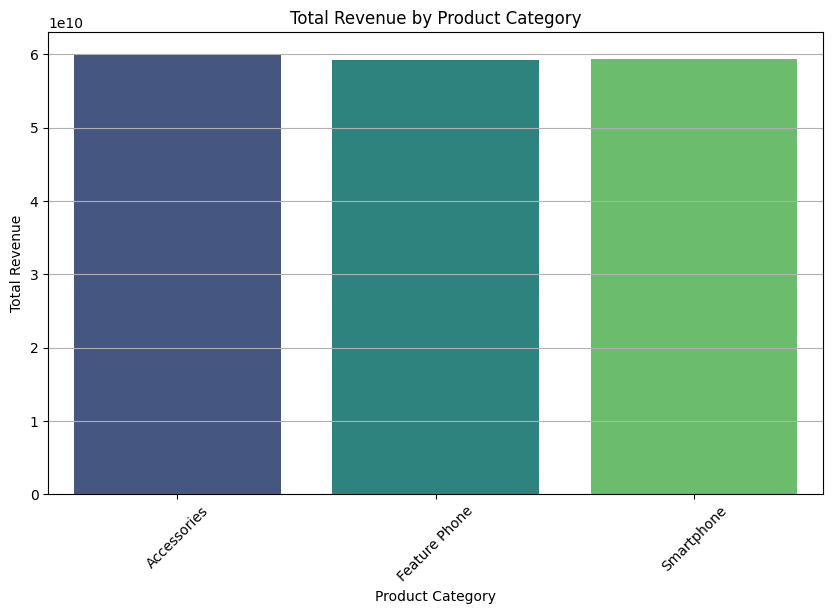

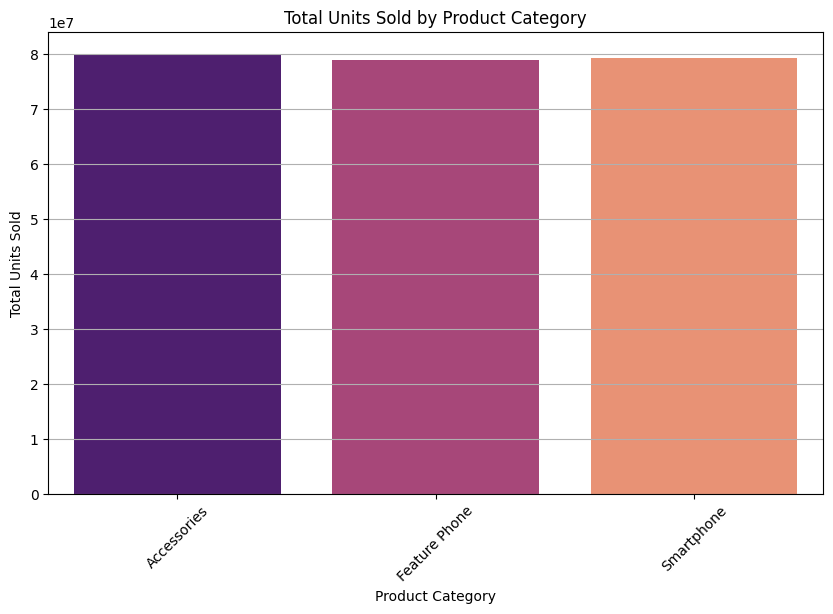

In [11]:
category_sales = df_sales.groupby('Product_Category')[['Revenue', 'Units_Sold']].sum().reset_index()

print("Sales Data by Product Category:")
print(category_sales)

# Create bar chart for total Revenue by Product Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_Category', y='Revenue', data=category_sales, palette='viridis', hue='Product_Category', legend=False)
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Create bar chart for total Units Sold by Product Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_Category', y='Units_Sold', data=category_sales, palette='magma', hue='Product_Category', legend=False)
plt.title('Total Units Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Reasoning**:
To analyze revenue trends for each product category over time, I will group the `df_sales` DataFrame by both 'Product_Category' and 'Year', summing the 'Revenue'. Then, I will visualize these trends using a line plot, as specified in the instructions.



Revenue Trend by Product Category Over Time:
  Product_Category  Year       Revenue
0      Accessories  2015  6.101476e+09
1      Accessories  2016  5.919460e+09
2      Accessories  2017  6.113013e+09
3      Accessories  2018  6.010371e+09
4      Accessories  2019  5.956510e+09


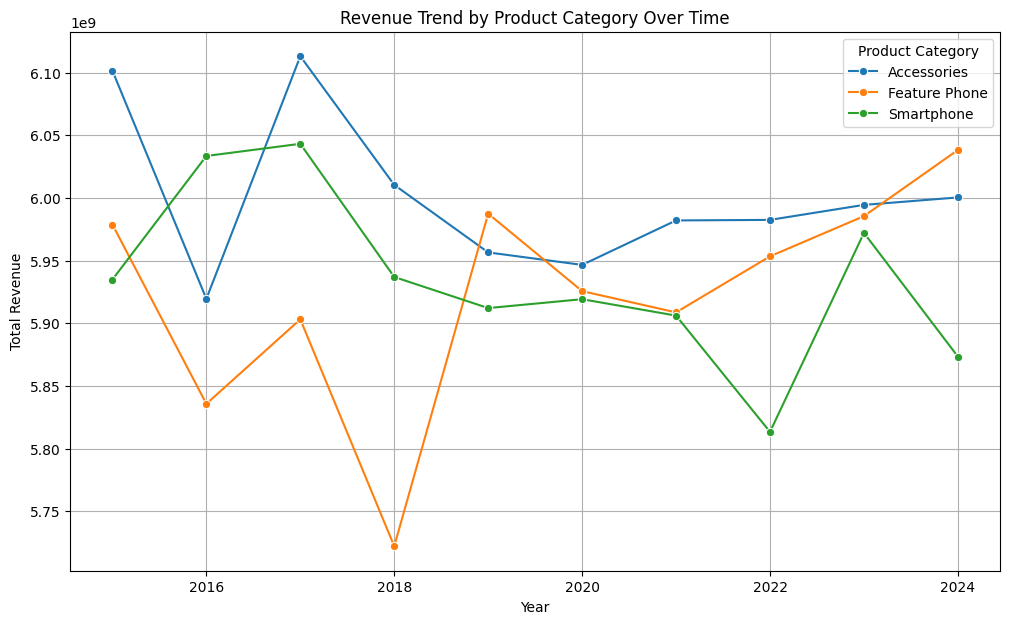

In [12]:
category_yearly_revenue = df_sales.groupby(['Product_Category', 'Year'])['Revenue'].sum().reset_index()

print("Revenue Trend by Product Category Over Time:")
print(category_yearly_revenue.head())

# Create a line plot for Revenue Trend by Product Category Over Time
plt.figure(figsize=(12, 7))
sns.lineplot(x='Year', y='Revenue', hue='Product_Category', data=category_yearly_revenue, marker='o')
plt.title('Revenue Trend by Product Category Over Time')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.legend(title='Product Category')
plt.show()

**Reasoning**:
To identify the top-selling smartphone models, I will first filter the `df_sales` DataFrame for 'Smartphone' products. Then, I will aggregate this filtered data by 'Model' to sum 'Revenue' and 'Units_Sold', sort by 'Revenue' in descending order to get the top 5 models, and visualize their revenue and units sold using bar plots.



Top 5 Smartphone Models by Revenue:
        Model       Revenue  Units_Sold
10  Model K11  3.088251e+09     4099367
17  Model R18  3.049077e+09     4071774
13  Model N14  3.036762e+09     4022919
14  Model O15  3.028656e+09     4019210
7    Model H8  3.022311e+09     4018771


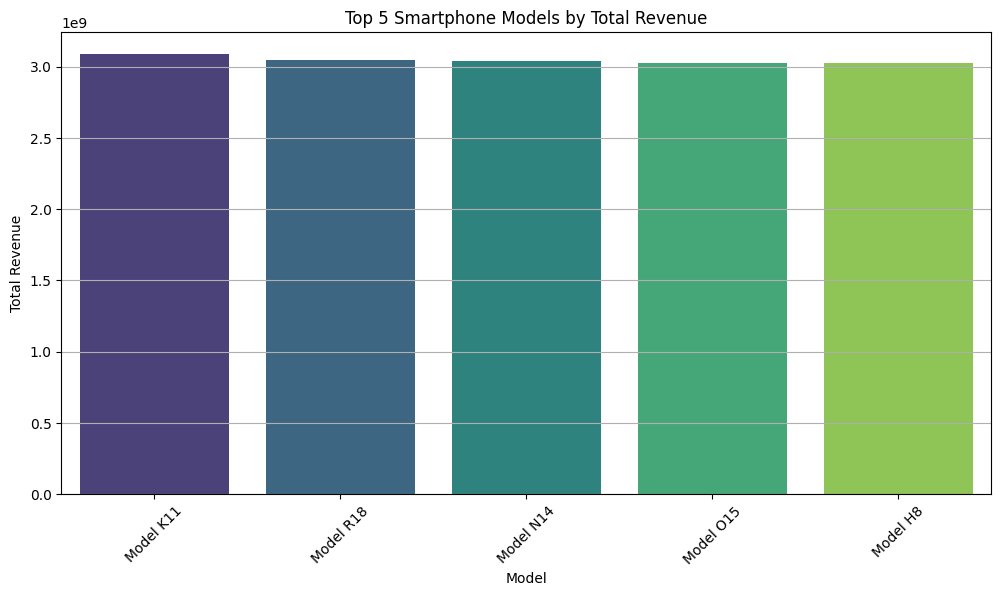

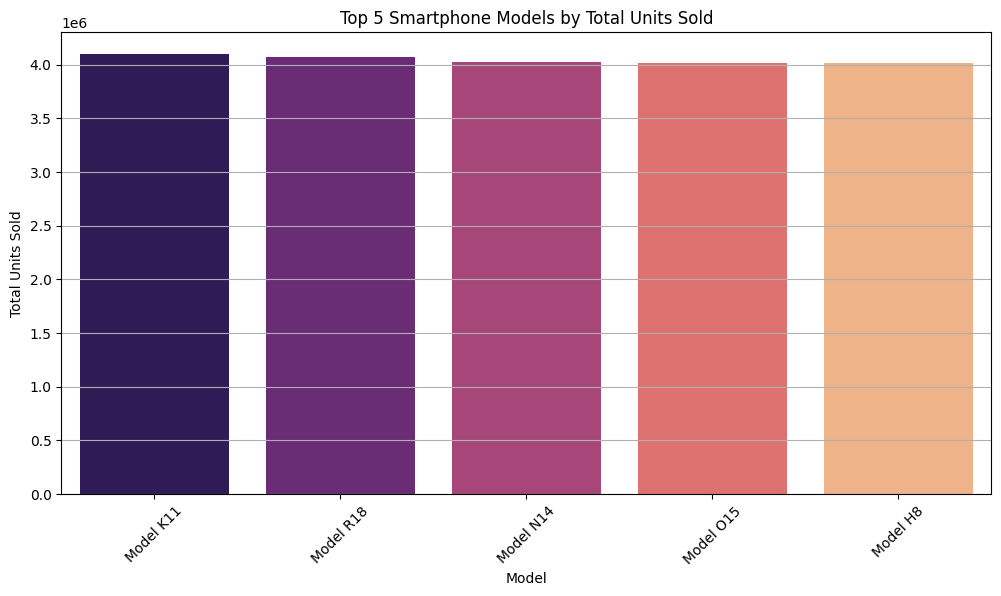

In [13]:
smartphone_sales = df_sales[df_sales['Product_Category'] == 'Smartphone'].copy()

model_sales = smartphone_sales.groupby('Model')[['Revenue', 'Units_Sold']].sum().reset_index()

top_5_models = model_sales.sort_values(by='Revenue', ascending=False).head(5)

print("Top 5 Smartphone Models by Revenue:")
print(top_5_models)

# Create bar chart for Top 5 Smartphone Models by Total Revenue
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Revenue', data=top_5_models, palette='viridis', hue='Model', legend=False)
plt.title('Top 5 Smartphone Models by Total Revenue')
plt.xlabel('Model')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Create bar chart for Top 5 Smartphone Models by Total Units Sold
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Units_Sold', data=top_5_models, palette='magma', hue='Model', legend=False)
plt.title('Top 5 Smartphone Models by Total Units Sold')
plt.xlabel('Model')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Market Share Analysis

### Subtask:
Visualize the market share distribution of different product categories over time.


**Reasoning**:
To visualize the market share distribution, I will first calculate the total revenue for each product category per year and the total revenue for each year across all categories. Then, I will compute the market share as a percentage for each product category per year by dividing the category's yearly revenue by the total yearly revenue, and finally display the first few rows of this calculated data.



In [14]:
category_yearly_revenue = df_sales.groupby(['Year', 'Product_Category'])['Revenue'].sum().reset_index()
total_yearly_revenue = df_sales.groupby('Year')['Revenue'].sum().reset_index()
total_yearly_revenue.rename(columns={'Revenue': 'Total_Yearly_Revenue'}, inplace=True)

market_share_data = pd.merge(category_yearly_revenue, total_yearly_revenue, on='Year')
market_share_data['Market_Share_Percentage'] = (market_share_data['Revenue'] / market_share_data['Total_Yearly_Revenue']) * 100

print("Market Share Data by Product Category Over Time:")
print(market_share_data.head())


Market Share Data by Product Category Over Time:
   Year Product_Category       Revenue  Total_Yearly_Revenue  \
0  2015      Accessories  6.101476e+09          1.801507e+10   
1  2015    Feature Phone  5.978734e+09          1.801507e+10   
2  2015       Smartphone  5.934857e+09          1.801507e+10   
3  2016      Accessories  5.919460e+09          1.778864e+10   
4  2016    Feature Phone  5.835737e+09          1.778864e+10   

   Market_Share_Percentage  
0                33.868740  
1                33.187408  
2                32.943852  
3                33.276624  
4                32.805966  


**Reasoning**:
To visualize the market share distribution of different product categories over time, I will use the previously calculated 'market_share_data' and create a line plot to show the trend of 'Market_Share_Percentage' for each 'Product_Category' across 'Year'.



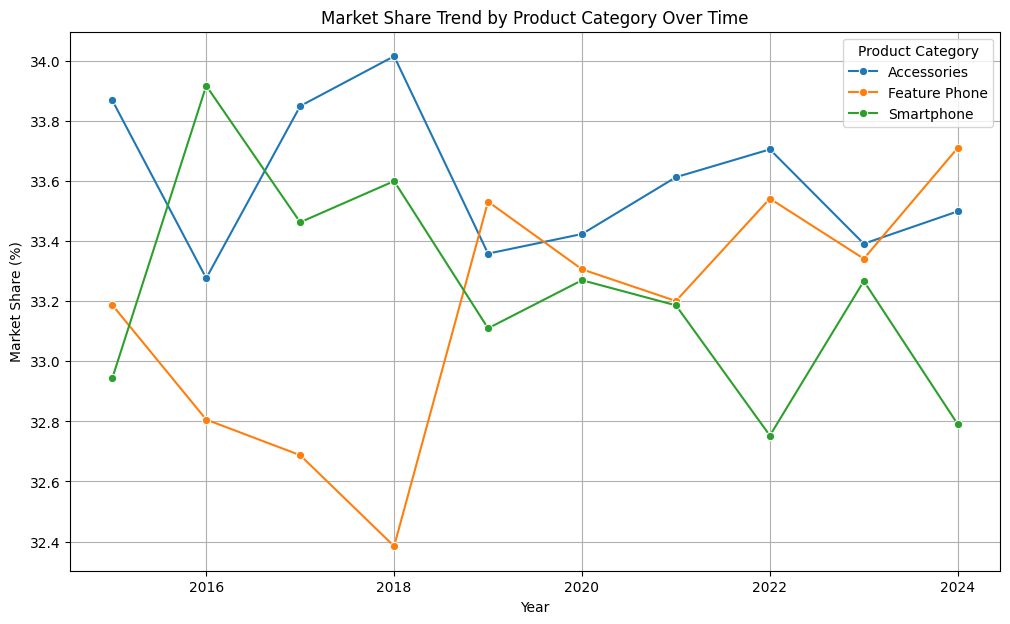

In [15]:
plt.figure(figsize=(12, 7))
sns.lineplot(x='Year', y='Market_Share_Percentage', hue='Product_Category', data=market_share_data, marker='o')
plt.title('Market Share Trend by Product Category Over Time')
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.grid(True)
plt.legend(title='Product Category')
plt.show()

## Advanced Visualizations and Insights

### Subtask:
Create more complex visualizations such as heatmaps for sales seasonality, scatter plots for correlation analysis (e.g., units sold vs. revenue growth), or interactive dashboards for a 'full analytical application'.


**Reasoning**:
To visualize sales seasonality, I will first aggregate the `df_sales` data by 'Year' and 'Month_Name' to calculate the total revenue for each month across all years. This step prepares the data for creating a pivot table which is essential for the heatmap visualization.



In [16]:
monthly_revenue = df_sales.groupby(['Year', 'Month_Name'])['Revenue'].sum().reset_index()

print("Aggregated Monthly Revenue:")
print(monthly_revenue.head())

Aggregated Monthly Revenue:
   Year Month_Name       Revenue
0  2015      April  1.513886e+09
1  2015     August  1.505510e+09
2  2015   December  1.534552e+09
3  2015   February  1.520799e+09
4  2015    January  1.480292e+09


**Reasoning**:
To prepare the data for a heatmap visualization, I will create a pivot table from the aggregated monthly revenue, using 'Year' as the index, 'Month_Name' as columns, and 'Revenue' as values. I will also ensure the months are ordered correctly for better visualization. Finally, I will generate a heatmap using Seaborn to visualize the monthly revenue across different years, including appropriate labels and a color bar.



/tmp/ipython-input-2935284803.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  revenue_pivot = monthly_revenue.pivot_table(index='Year', columns='Month_Name', values='Revenue')


Pivot table for monthly revenue:
Month_Name       January      February         March         April  \
Year                                                                 
2015        1.480292e+09  1.520799e+09  1.504014e+09  1.513886e+09   
2016        1.489145e+09  1.519116e+09  1.491992e+09  1.495295e+09   
2017        1.479199e+09  1.515744e+09  1.462035e+09  1.540000e+09   
2018        1.533305e+09  1.431829e+09  1.455820e+09  1.448883e+09   
2019        1.518034e+09  1.434214e+09  1.473254e+09  1.448108e+09   

Month_Name           May          June          July        August  \
Year                                                                 
2015        1.517816e+09  1.568508e+09  1.351811e+09  1.505510e+09   
2016        1.411585e+09  1.461682e+09  1.445558e+09  1.554794e+09   
2017        1.538818e+09  1.576173e+09  1.413356e+09  1.563343e+09   
2018        1.473430e+09  1.484239e+09  1.472249e+09  1.503617e+09   
2019        1.482853e+09  1.534959e+09  1.494576e+09  1.

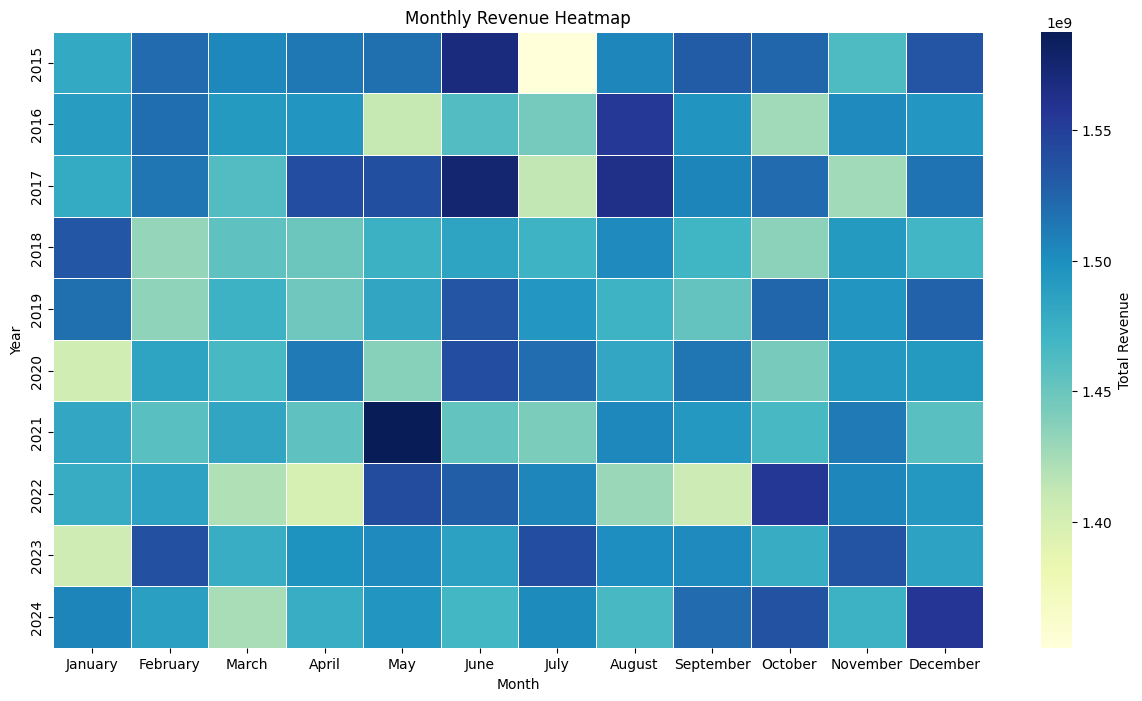

In [17]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue['Month_Name'] = pd.Categorical(monthly_revenue['Month_Name'], categories=month_order, ordered=True)

# Create a pivot table for the heatmap
revenue_pivot = monthly_revenue.pivot_table(index='Year', columns='Month_Name', values='Revenue')

print("Pivot table for monthly revenue:")
print(revenue_pivot.head())

# Generate the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(revenue_pivot, cmap='YlGnBu', fmt=".0f", linewidths=.5, cbar_kws={'label': 'Total Revenue'})
plt.title('Monthly Revenue Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

**Reasoning**:
To suppress the `FutureWarning` issued by pandas regarding the `observed` parameter in `pivot_table`, I will explicitly set `observed=False` in the `pivot_table` call. This will ensure future compatibility and prevent the warning from appearing.



Pivot table for monthly revenue:
Month_Name       January      February         March         April  \
Year                                                                 
2015        1.480292e+09  1.520799e+09  1.504014e+09  1.513886e+09   
2016        1.489145e+09  1.519116e+09  1.491992e+09  1.495295e+09   
2017        1.479199e+09  1.515744e+09  1.462035e+09  1.540000e+09   
2018        1.533305e+09  1.431829e+09  1.455820e+09  1.448883e+09   
2019        1.518034e+09  1.434214e+09  1.473254e+09  1.448108e+09   

Month_Name           May          June          July        August  \
Year                                                                 
2015        1.517816e+09  1.568508e+09  1.351811e+09  1.505510e+09   
2016        1.411585e+09  1.461682e+09  1.445558e+09  1.554794e+09   
2017        1.538818e+09  1.576173e+09  1.413356e+09  1.563343e+09   
2018        1.473430e+09  1.484239e+09  1.472249e+09  1.503617e+09   
2019        1.482853e+09  1.534959e+09  1.494576e+09  1.

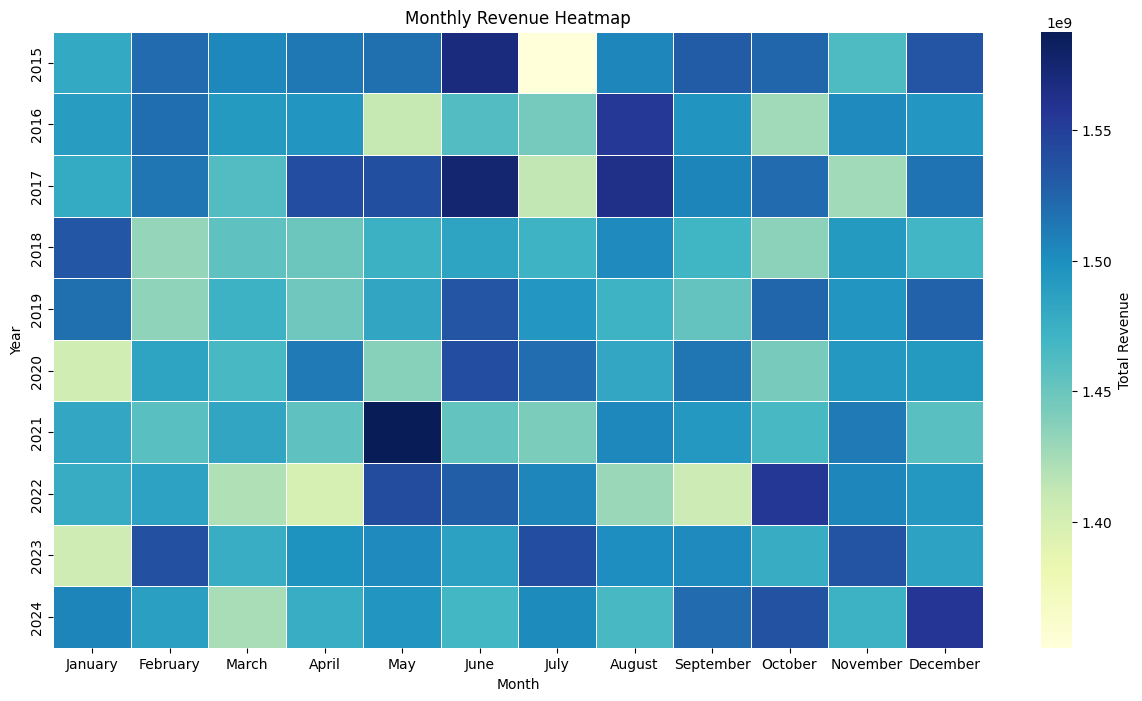

In [18]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_revenue['Month_Name'] = pd.Categorical(monthly_revenue['Month_Name'], categories=month_order, ordered=True)

# Create a pivot table for the heatmap
revenue_pivot = monthly_revenue.pivot_table(index='Year', columns='Month_Name', values='Revenue', observed=False)

print("Pivot table for monthly revenue:")
print(revenue_pivot.head())

# Generate the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(revenue_pivot, cmap='YlGnBu', fmt=".0f", linewidths=.5, cbar_kws={'label': 'Total Revenue'})
plt.title('Monthly Revenue Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

## Summary and Key Findings

### Subtask:
Summarize the key insights and findings from the data analysis and visualizations.
